**AMULYA REDDY DATLA  
CSE 574  
PROJECT-1  
UB PERSON NUMBER: 50560100  
UBIT NAME: AMULYARE  
UBMAIL: AMULYARE@BUFFALO.EDU** 

In [11]:
#Ignore the warnings if any
import warnings
warnings.filterwarnings('ignore')

*The above code snippet ignores all the warnings that might occur while running the code*

In [12]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

*The above code snippet imports all the required libraries*

In [13]:
#Setting the option to display maximum number of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*The above code snippet sets the option to visialize maximum number of columns and rows*

**1. Load the dataset (Points: 5)**

In [14]:
#Load the dataset
columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
file_path = r"C:\Users\L E N O V O\Desktop\ML\Project_1_python\dataset_adult\adult.data"
df = pd.read_csv(file_path, names=columns,sep=",\s*",engine="python",na_values="?")

*The above code loads a CSV dataset named "adult.data" into a pandas DataFrame, specifying column names, using comma-space as the separator and handling "?" as missing values*

**2. Output the structure of the dataset (Points: 10)**

In [15]:
#Display few tuples of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
#Display the column names of the data
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
#Display the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
#Describe the statistical characteristics of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
#Display datatype of values in each column
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [20]:
#Display the shape of the dataset
print("Shape of the dataset is",df.shape)

Shape of the dataset is (32561, 15)


*The above commands display a sample of the data, list column names, summarize data types and missing values, provide descriptive statistics for numerical columns, and show the overall dimensions of the dataset. All these together offer a comprehensive initial overview of the structure and content of the dataset.*

**3. Clean the dataset, handle the missing values and encode the categorical values (Points: 15)**

In [21]:
#Display the number of null values in the data before cleaning
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [22]:
#Data cleaning step to remove duplicates
df.drop_duplicates(inplace=True)

In [23]:
#Handling missing values
categorical_columns=df.select_dtypes(include=['object']).columns
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print("Categorical columns in the dataset are:",categorical_columns)
print("Numerical columns in the dataset are:",numerical_columns)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0],inplace=True)
for col in numerical_columns:
    df[col].fillna(df[col].mean,inplace=True)

Categorical columns in the dataset are: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
Numerical columns in the dataset are: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [24]:
#Display number of unique values for each categorical columns
distinct_values = df[categorical_columns].nunique()
print(distinct_values)

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64


In [25]:
#Displaying number of null values after data cleaning
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


*A comprehensive data cleaning process is formed by the above collective steps, through which data quality issues, such as missing values and duplicates, are identified and quantified. Redundant entries are removed, and missing data is handled appropriately, with categorical gaps being filled by the mode and numerical gaps by the mean. Insights into the structure of categorical data are provided through unique value counts. The effectiveness of the cleaning is verified by a final check for remaining null values. Consequently, the dataset is rendered more suitable for further analysis or modeling, and the risk of inaccurate results or misleading insights is minimized.*

In [26]:
#Label encoding of categorical features
encoding_maps = [] 
for col in categorical_columns:
    unique_values = df[col].unique()
    value_to_number = {value: number for number, value in enumerate(unique_values, start=1)}
    df[col] = df[col].map(value_to_number)
    encoding_maps.append({
        'column': col,
        'mapping': value_to_number
    })
k={}
for encoding in encoding_maps:
    k[encoding['column']]=encoding['mapping']
    print(encoding['column'],k[encoding['column']])

workclass {'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}
education {'Bachelors': 1, 'HS-grad': 2, '11th': 3, 'Masters': 4, '9th': 5, 'Some-college': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, '7th-8th': 9, 'Doctorate': 10, 'Prof-school': 11, '5th-6th': 12, '10th': 13, '1st-4th': 14, 'Preschool': 15, '12th': 16}
marital-status {'Never-married': 1, 'Married-civ-spouse': 2, 'Divorced': 3, 'Married-spouse-absent': 4, 'Separated': 5, 'Married-AF-spouse': 6, 'Widowed': 7}
occupation {'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Craft-repair': 7, 'Transport-moving': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
relationship {'Not-in-family': 1, 'Husband': 2, 'Wife': 3, 'Own-child': 4, 'Unmarried': 5, 'Other-relative': 6}
race {'White': 1, 'Bla

*The above code snippet performs label encoding on categorical features within a dataset by iterating through each categorical column and creating a unique mapping of categorical values to numerical labels. The original categorical values in the dataframe are replaced with their corresponding numerical labels, and these mappings are stored in a list called 'encoding_maps' for future reference.*

In [27]:
#Displaying shape of the data frame and few tuples after data cleaning and encoding
print(df.shape)
df.head()

(32537, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2,1


*The above code snippet displays the shape and few tuples of the data after performing the data cleaning and encoding.*

**4.Explore the data to understand better, for example, draw a bar plot to identify the 
distribution of the population in the dataset by age, followed by distribution of income by 
gender. (Points: 20)**

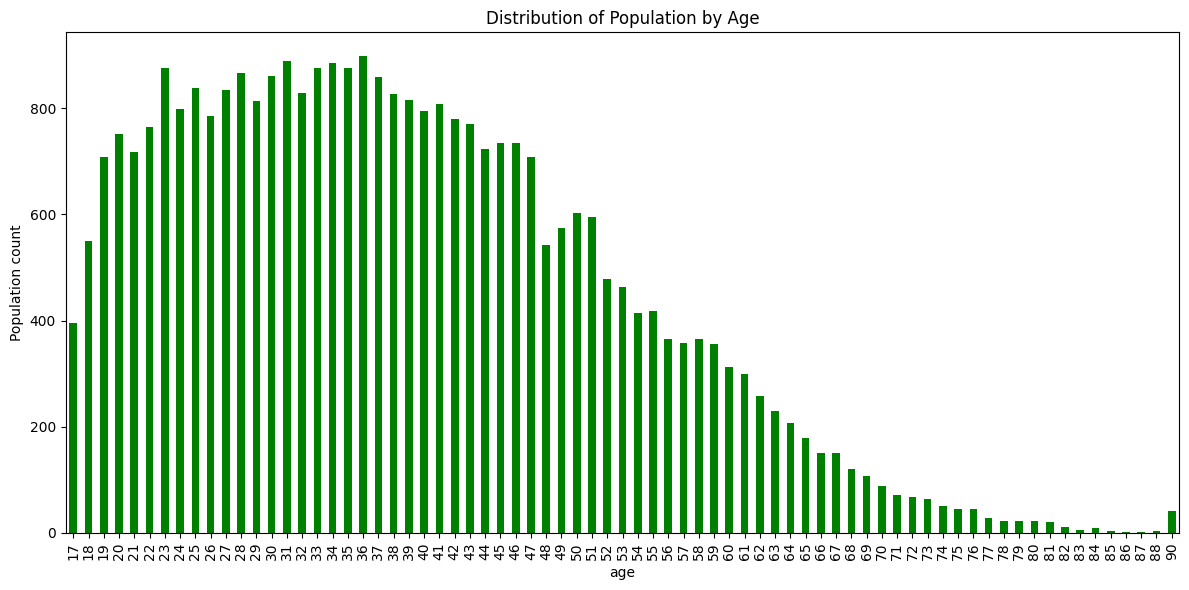

In [28]:
#Barplot for distribution of population by age
plt.figure(figsize=(12, 6))
df['age'].value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Distribution of Population by Age')
plt.xlabel('age')
plt.ylabel('Population count')
plt.tight_layout()
plt.show()

The above bar plot is showing the distribution of population by age. Each bar represents the population count for a specific age, with ages on the x-axis and population count on the y-axis. The bars are colored green. The chart is titled "Distribution of Population by Age," and it appears to have a peak in the younger age groups, gradually declining as age increases. The layout is adjusted for clarity, with labels for both axes

{'<=50K': 1, '>50K': 2} {'Male': 1, 'Female': 2}


<Figure size 1200x600 with 0 Axes>

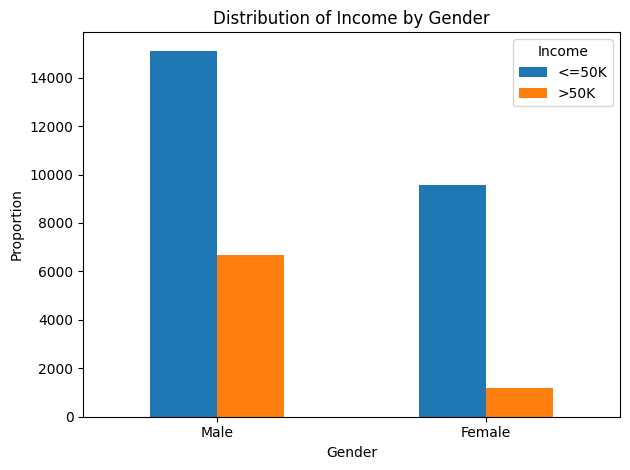

In [29]:
# Barplot for distribution of income by gender
print(k['income'],k['sex'])
plt.figure(figsize=(12, 6))
income_by_gender = df.groupby(['sex', 'income']).size().unstack()
income_by_gender.plot(kind='bar')
plt.title('Distribution of Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Male', 'Female'],rotation=0)
plt.legend(title='Income',labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

The above bar plot illustrates the distribution of income by gender. It shows that a larger number of males earn both <=50K and >50K compared to females. For both genders, the majority fall into the <=50K category, but the disparity is more pronounced among females, with a smaller proportion earning >50K. This plot highlights a gender gap in higher income brackets.

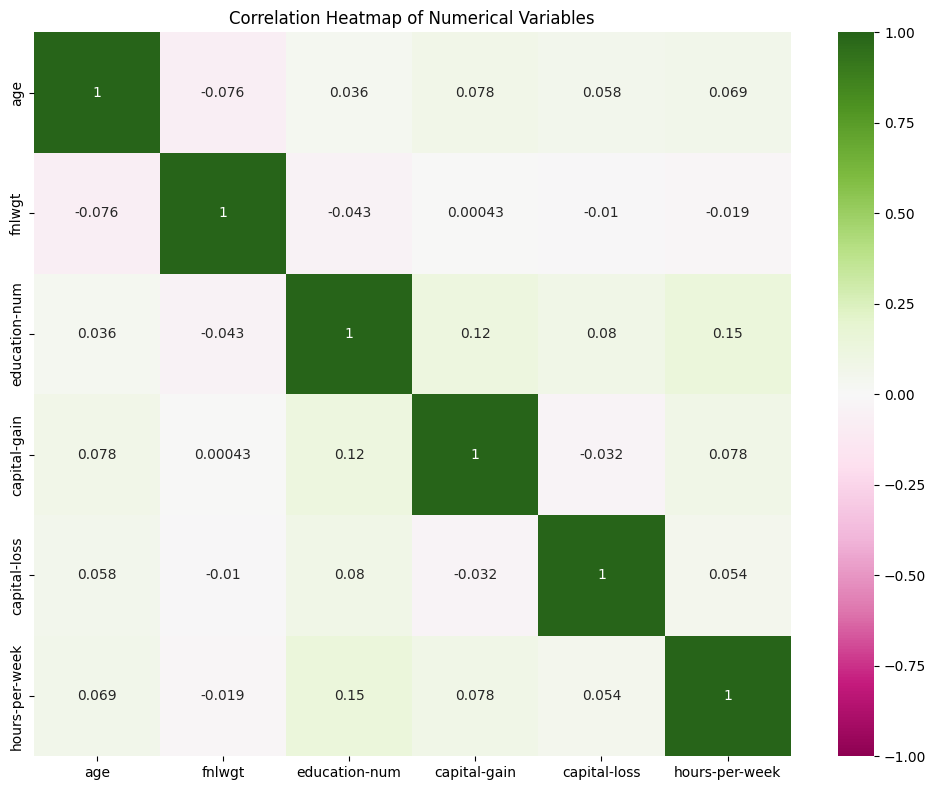

In [30]:
#Correlation matrix for all the numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

The above correlation heatmap shows the relationships between numerical features, with colors indicating the strength and direction of correlations. Most variables exhibit weak correlations, as reflected by the light colors.

In [31]:
#Display of correlation matrix
print(df[numerical_columns].corr())

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076447       0.036224      0.077676      0.057745   
fnlwgt         -0.076447  1.000000      -0.043388      0.000429     -0.010260   
education-num   0.036224 -0.043388       1.000000      0.122664      0.079892   
capital-gain    0.077676  0.000429       0.122664      1.000000     -0.031639   
capital-loss    0.057745 -0.010260       0.079892     -0.031639      1.000000   
hours-per-week  0.068515 -0.018898       0.148422      0.078408      0.054229   

                hours-per-week  
age                   0.068515  
fnlwgt               -0.018898  
education-num         0.148422  
capital-gain          0.078408  
capital-loss          0.054229  
hours-per-week        1.000000  


The above code snippet calculates and displays the correlation matrix for the numerical columns in the DataFrame. The resulting correlation matrix shows the relationships between numerical features.

{'Bachelors': 1, 'HS-grad': 2, '11th': 3, 'Masters': 4, '9th': 5, 'Some-college': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, '7th-8th': 9, 'Doctorate': 10, 'Prof-school': 11, '5th-6th': 12, '10th': 13, '1st-4th': 14, 'Preschool': 15, '12th': 16}


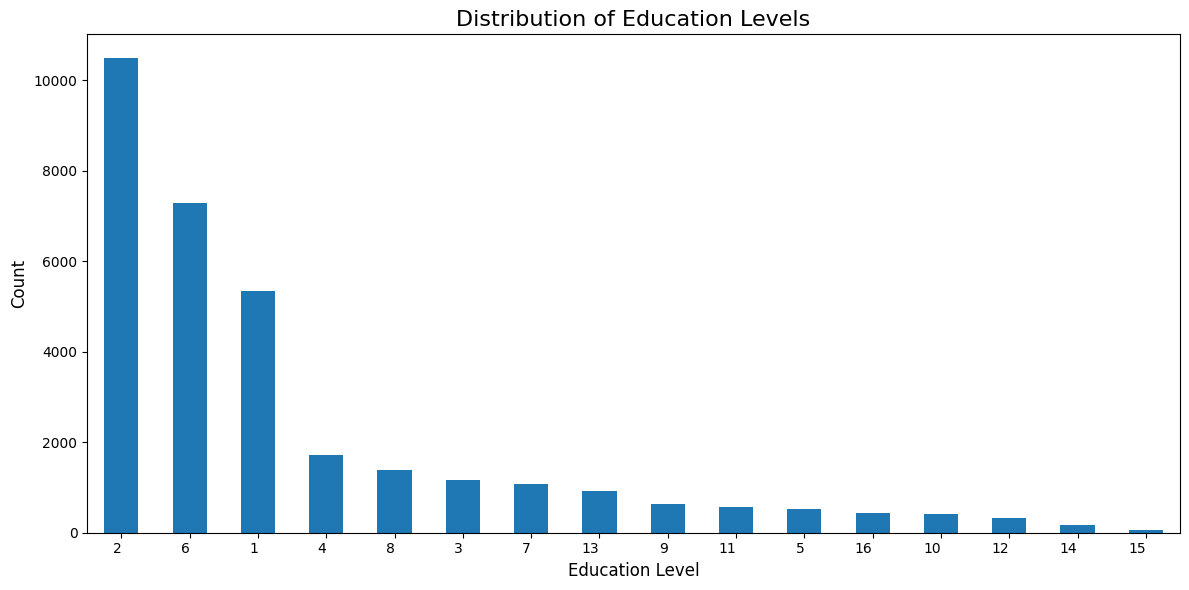

In [32]:
# Distribution of education levels
print(k['education'])
plt.figure(figsize=(12, 6))
education_counts = df['education'].value_counts().sort_values(ascending=False)
education_counts.plot(kind='bar')
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

The above bar chart shows the distribution of education levels. Most individuals fall into the education levels of HS-grad, Some-college and Bachelors with the highest counts. The education level Preschool is the least. The x-axis lists education levels, and the y-axis shows the count of individuals.

{'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Craft-repair': 7, 'Transport-moving': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}


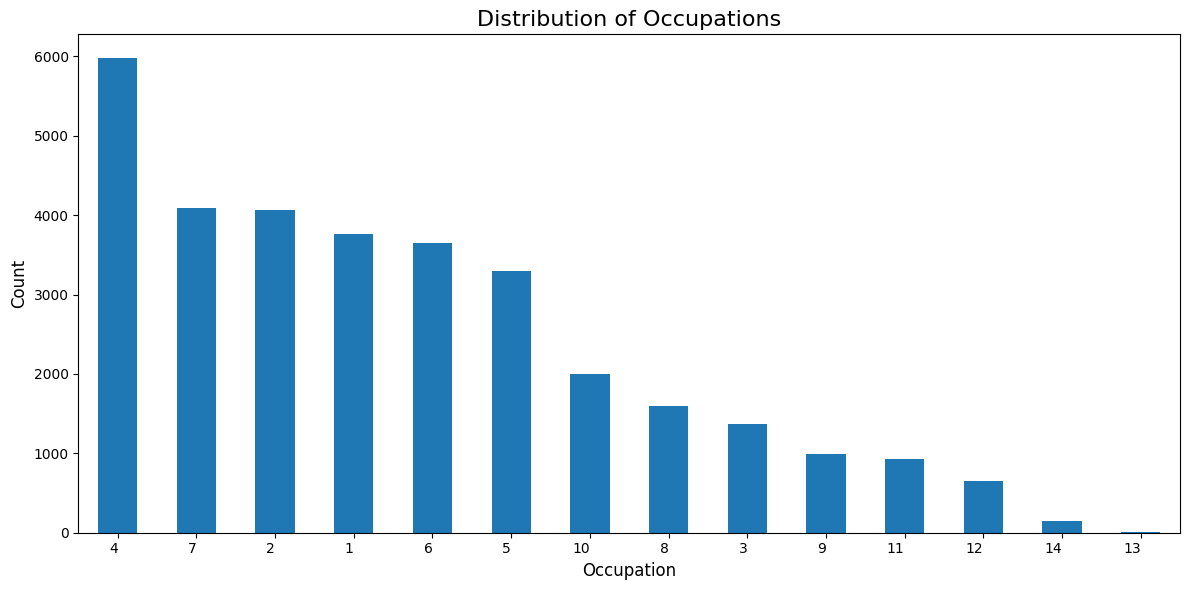

In [33]:
# Distribution of occupations
print(k['occupation'])
plt.figure(figsize=(12, 6))
occupation_counts = df['occupation'].value_counts().sort_values(ascending=False)
occupation_counts.plot(kind='bar')
plt.title('Distribution of Occupations', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

The above bar chart shows the distribution of Occupations. Occupation of Prof-specialty has the highest count of individuals. Occupations Craft-repair, Exec-managerial and Adm-clerical have reasonably good count of individuals.The occupation of Armed-Forces is the least. The x-axis lists Occupations, and the y-axis shows the count of individuals.

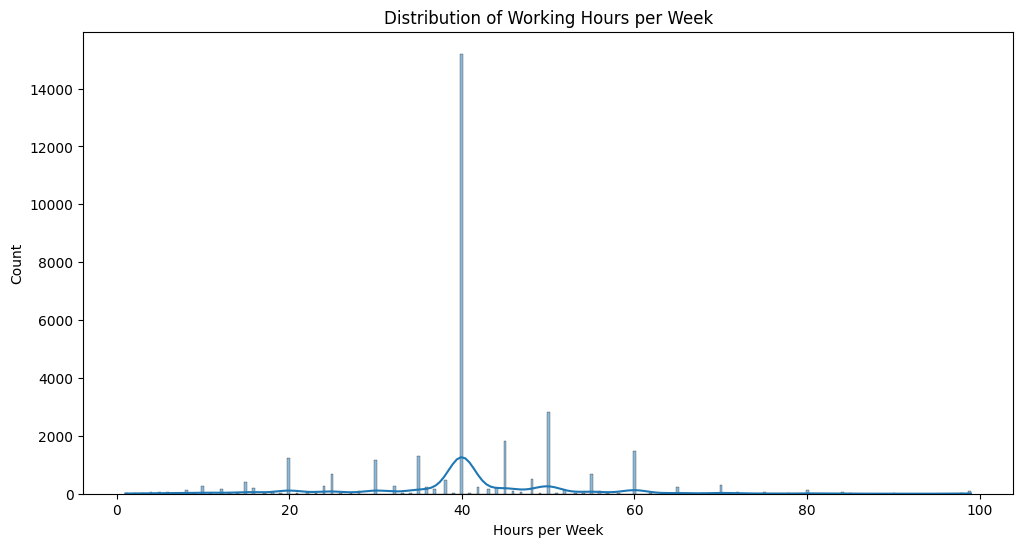

In [34]:
#Distribution of Working Hours per Week
plt.figure(figsize=(12, 6))
sns.histplot(df['hours-per-week'], kde=True)
plt.title('Distribution of Working Hours per Week')
plt.xlabel('Hours per Week')
plt.show()

The above plot shows the distribution of working hours per week, with a sharp peak around 40 hours. The x-axis represents hours worked, and the y-axis shows the count of individuals. A density curve overlays the histogram to highlight the distribution pattern.

{'Never-married': 1, 'Married-civ-spouse': 2, 'Divorced': 3, 'Married-spouse-absent': 4, 'Separated': 5, 'Married-AF-spouse': 6, 'Widowed': 7} {'<=50K': 1, '>50K': 2}


<Figure size 1200x600 with 0 Axes>

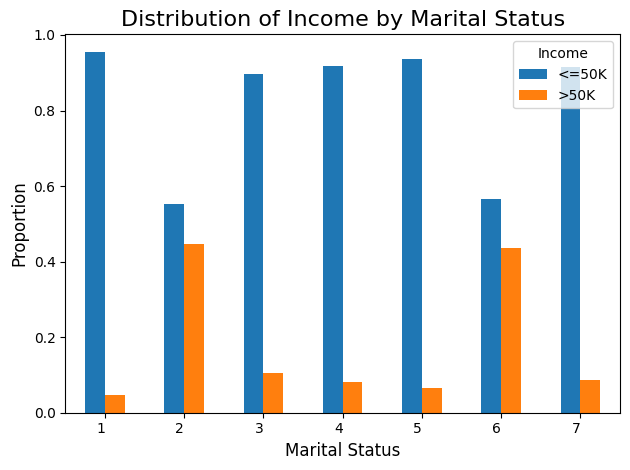

In [35]:
#Distribution of Income by Marital Status
print(k['marital-status'],k['income'])
plt.figure(figsize=(12, 6))
income_by_marital = df.groupby('marital-status')['income'].value_counts(normalize=True).unstack()
income_by_marital.plot(kind='bar', stacked=False)
plt.title('Distribution of Income by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

The above bar chart shows the distribution of income by marital status. Each marital status category is represented on the x-axis, with proportions of income levels (<=50K and >50K) on the y-axis. Blue bars indicate lower income, while orange bars indicate higher income. Most categories have a higher proportion of individuals earning <=50K.

<Figure size 2500x1000 with 0 Axes>

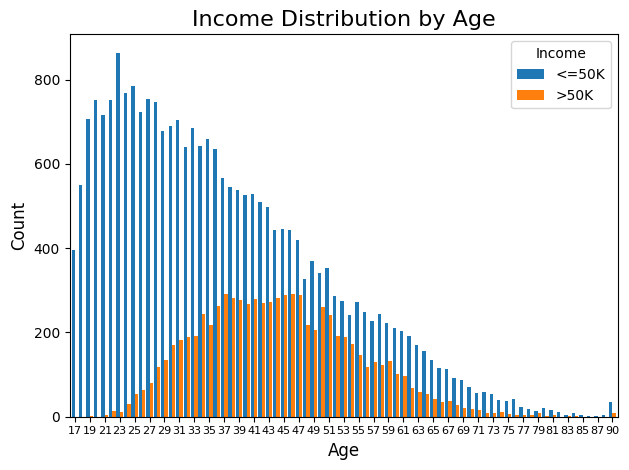

In [36]:
#Distribution of income by age
income_by_age = df.groupby(['age', 'income']).size().unstack()
income_by_age.columns = ['<=50K', '>50K']
plt.figure(figsize=(25, 10))
income_by_age.plot(kind='bar', stacked=False, width=0.9)
plt.title('Income Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income')
plt.xticks(range(0, len(income_by_age), 2), income_by_age.index[::2], rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

The bar chart illustrates income distribution by age. The x-axis represents age groups, while the y-axis shows the count of individuals. Two income categories (<=50K and >50K) are displayed with different colors. The chart reveals that younger age groups have a higher count of individuals earning <=50K, with the distribution tapering off as age increases. The individuals within 37-39 and 47-49 are more likely to have earnings >50K.

{'Bachelors': 1, 'HS-grad': 2, '11th': 3, 'Masters': 4, '9th': 5, 'Some-college': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, '7th-8th': 9, 'Doctorate': 10, 'Prof-school': 11, '5th-6th': 12, '10th': 13, '1st-4th': 14, 'Preschool': 15, '12th': 16}


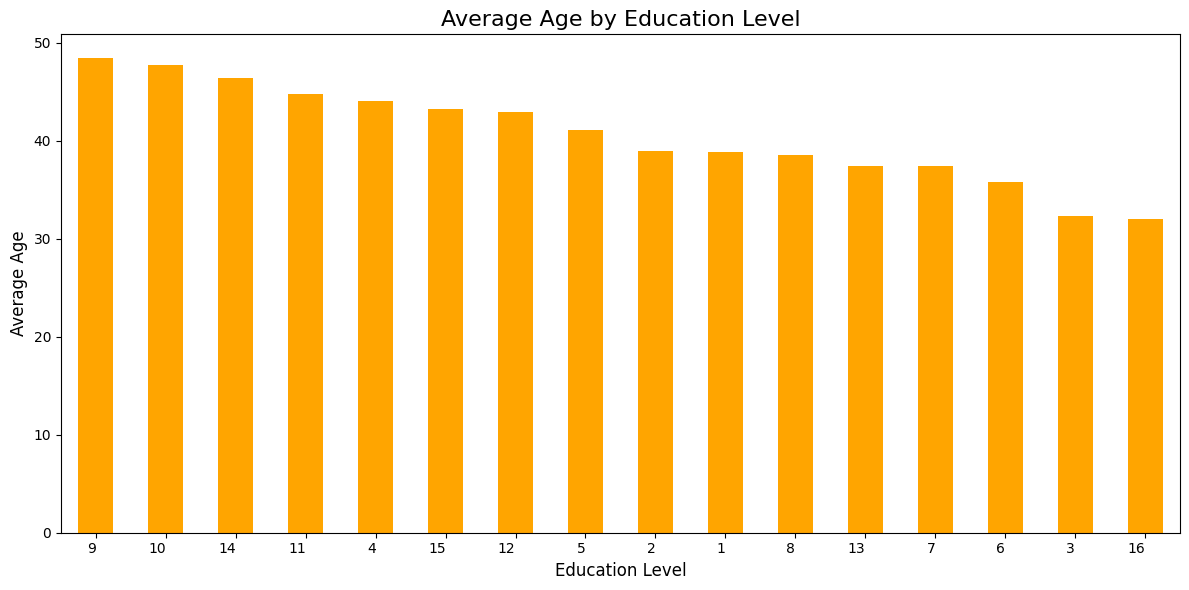

In [37]:
#Distribution of average Age by Education Level
print(k['education'])
avg_age_by_education = df.groupby('education')['age'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_age_by_education.plot(kind='bar', color='orange')
plt.title('Average Age by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

The above bar chart displays the average age by education level. The x-axis represents different education levels, while the y-axis shows the average age of individuals within each level. The bars are colored orange, and the chart indicates that higher education levels are associated with older average ages. The title and axis labels provide clear context for the data presented.

{'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}


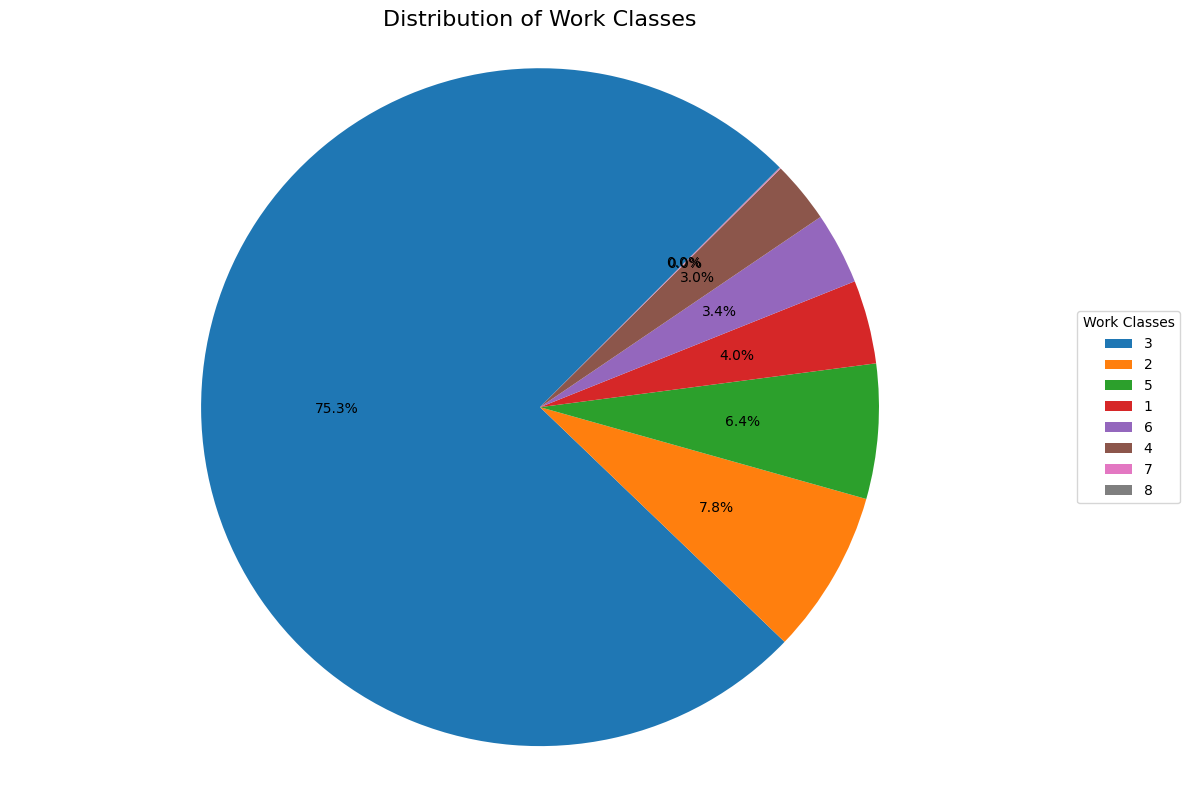

In [38]:
#Distribution of Work Classes
print(k['workclass'])
workclass_counts = df['workclass'].value_counts()
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(workclass_counts.values, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Work Classes', fontsize=16)
plt.axis('equal')
plt.legend(patches, workclass_counts.index, title="Work Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

The above pie chart displays the distribution of different work classes. The largest segment, comprising 75.3%, belongs to "Private" workclass. Other notable segments include "Self-emp-not-inc" at 7.8% and "Local-gov" at 6.4%. Smaller segments range from 0% to 4%. The chart is visually balanced with a legend indicating the work class numbers and their corresponding colors.

**5) Apply predictive modeling to the data to predict whether an individual earns more than 
$5π0K a year. (Points: 30)**

In [39]:
#Preparing the target and the features in training dataset
y_train = df['income']
X_train = df.drop(['income'], axis=1)

In [40]:
# Training the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    }
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} trained.")


Logistic Regression trained.

Random Forest trained.

SVM trained.

Decision Tree trained.

Gradient Boosting trained.

K-Nearest Neighbors trained.

Naive Bayes trained.

AdaBoost trained.

Extra Trees trained.


*The above code snippet prepares the training data by separating the target variable ('income') from the features. It initializes a dictionary of various classification models, including Logistic Regression, Random Forest, SVM, Decision Tree, Gradient Boosting, K-Nearest Neighbors, Naive Bayes, AdaBoost, and Extra Trees. The code then iterates through the dictionary, fitting each model to the training data (X_train and y_train) and printing a message upon successful training. This allows for the simultaneous training of multiple models for subsequent performance comparison in the machine learning pipeline.*

In [41]:
#loading test data
file_path = r"C:\Users\L E N O V O\Desktop\ML\Project_1_python\dataset_adult\adult.test"
df_test = pd.read_csv(file_path, names=columns, sep=",\s*", engine="python", na_values="?")
df_test = df_test[1:]
df_test=df_test.dropna()
df_test[numerical_columns] = df_test[numerical_columns].apply(pd.to_numeric, downcast="integer")
df_test['income'] = df_test['income'].str.replace('.', '', regex=False)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [42]:
#encoding
for col in categorical_columns:
    df_test[col] = df_test[col].map(k[col])

In [43]:
#Getting target and features for test data
y_test = df_test['income']
X_test = df_test.drop(['income'], axis=1)

*The above few snippets of code reads the test data from a CSV file, preprocesses it by handling missing values and data types, encodes categorical features using the same mapping as the training data, and separates the target variable ('income') from the features. The result is a prepared test dataset (X_test and y_test) ready for model evaluation*

In [44]:
# Accuracies of various models
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy*100:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 79.3559
              precision    recall  f1-score   support

           1       0.80      0.96      0.88     11360
           2       0.71      0.27      0.39      3700

    accuracy                           0.79     15060
   macro avg       0.76      0.62      0.63     15060
weighted avg       0.78      0.79      0.76     15060


Random Forest Accuracy: 84.9402
              precision    recall  f1-score   support

           1       0.88      0.93      0.90     11360
           2       0.73      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060


SVM Accuracy: 79.1169
              precision    recall  f1-score   support

           1       0.78      1.00      0.88     11360
           2       0.96      0.16      0.27      3700

    accuracy                           0.79     15060
   macro avg       0.87      0.58

*This code snippet evaluates the performance of selected machine learning models on the test dataset. It predicts outcomes using each model on the test data (X_test) and calculates accuracy by comparing predictions to the actual values (y_test). The accuracy is printed as a percentage for each model, along with a classification report that includes metrics like precision, recall, and F1-score, enabling a detailed comparison of model performances.*

Conclusion:
Based on the model accuracies, Gradient Boosting model achieved the highest accuracy at 86.22%, making it the best-performing model for this dataset. AdaBoost and Random Forest also performed well, with accuracies of 85.38% and 84.94% respectively. Extra Trees and Decision Tree showed moderate performance, with accuracies of 83.79% and 80.79%. Logistic Regression and SVM had similar accuracies, around 79%. Naive Bayes and K-Nearest Neighbors had the lowest accuracies, at 78.89% and 76.99%. Overall, ensemble methods like Gradient Boosting and AdaBoost provided superior accuracy compared to other models.

**6) In conclusion, prepare a project report with the code to show the diagrams and output 
generated and submit a poster using the template provided. Use creativity to represent the 
results in the poster format. In your poster, you need to cite the dataset as “Becker, B. & 
Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. 
https://doi.org/10.24432/C5XW20.”(Points: 20)**

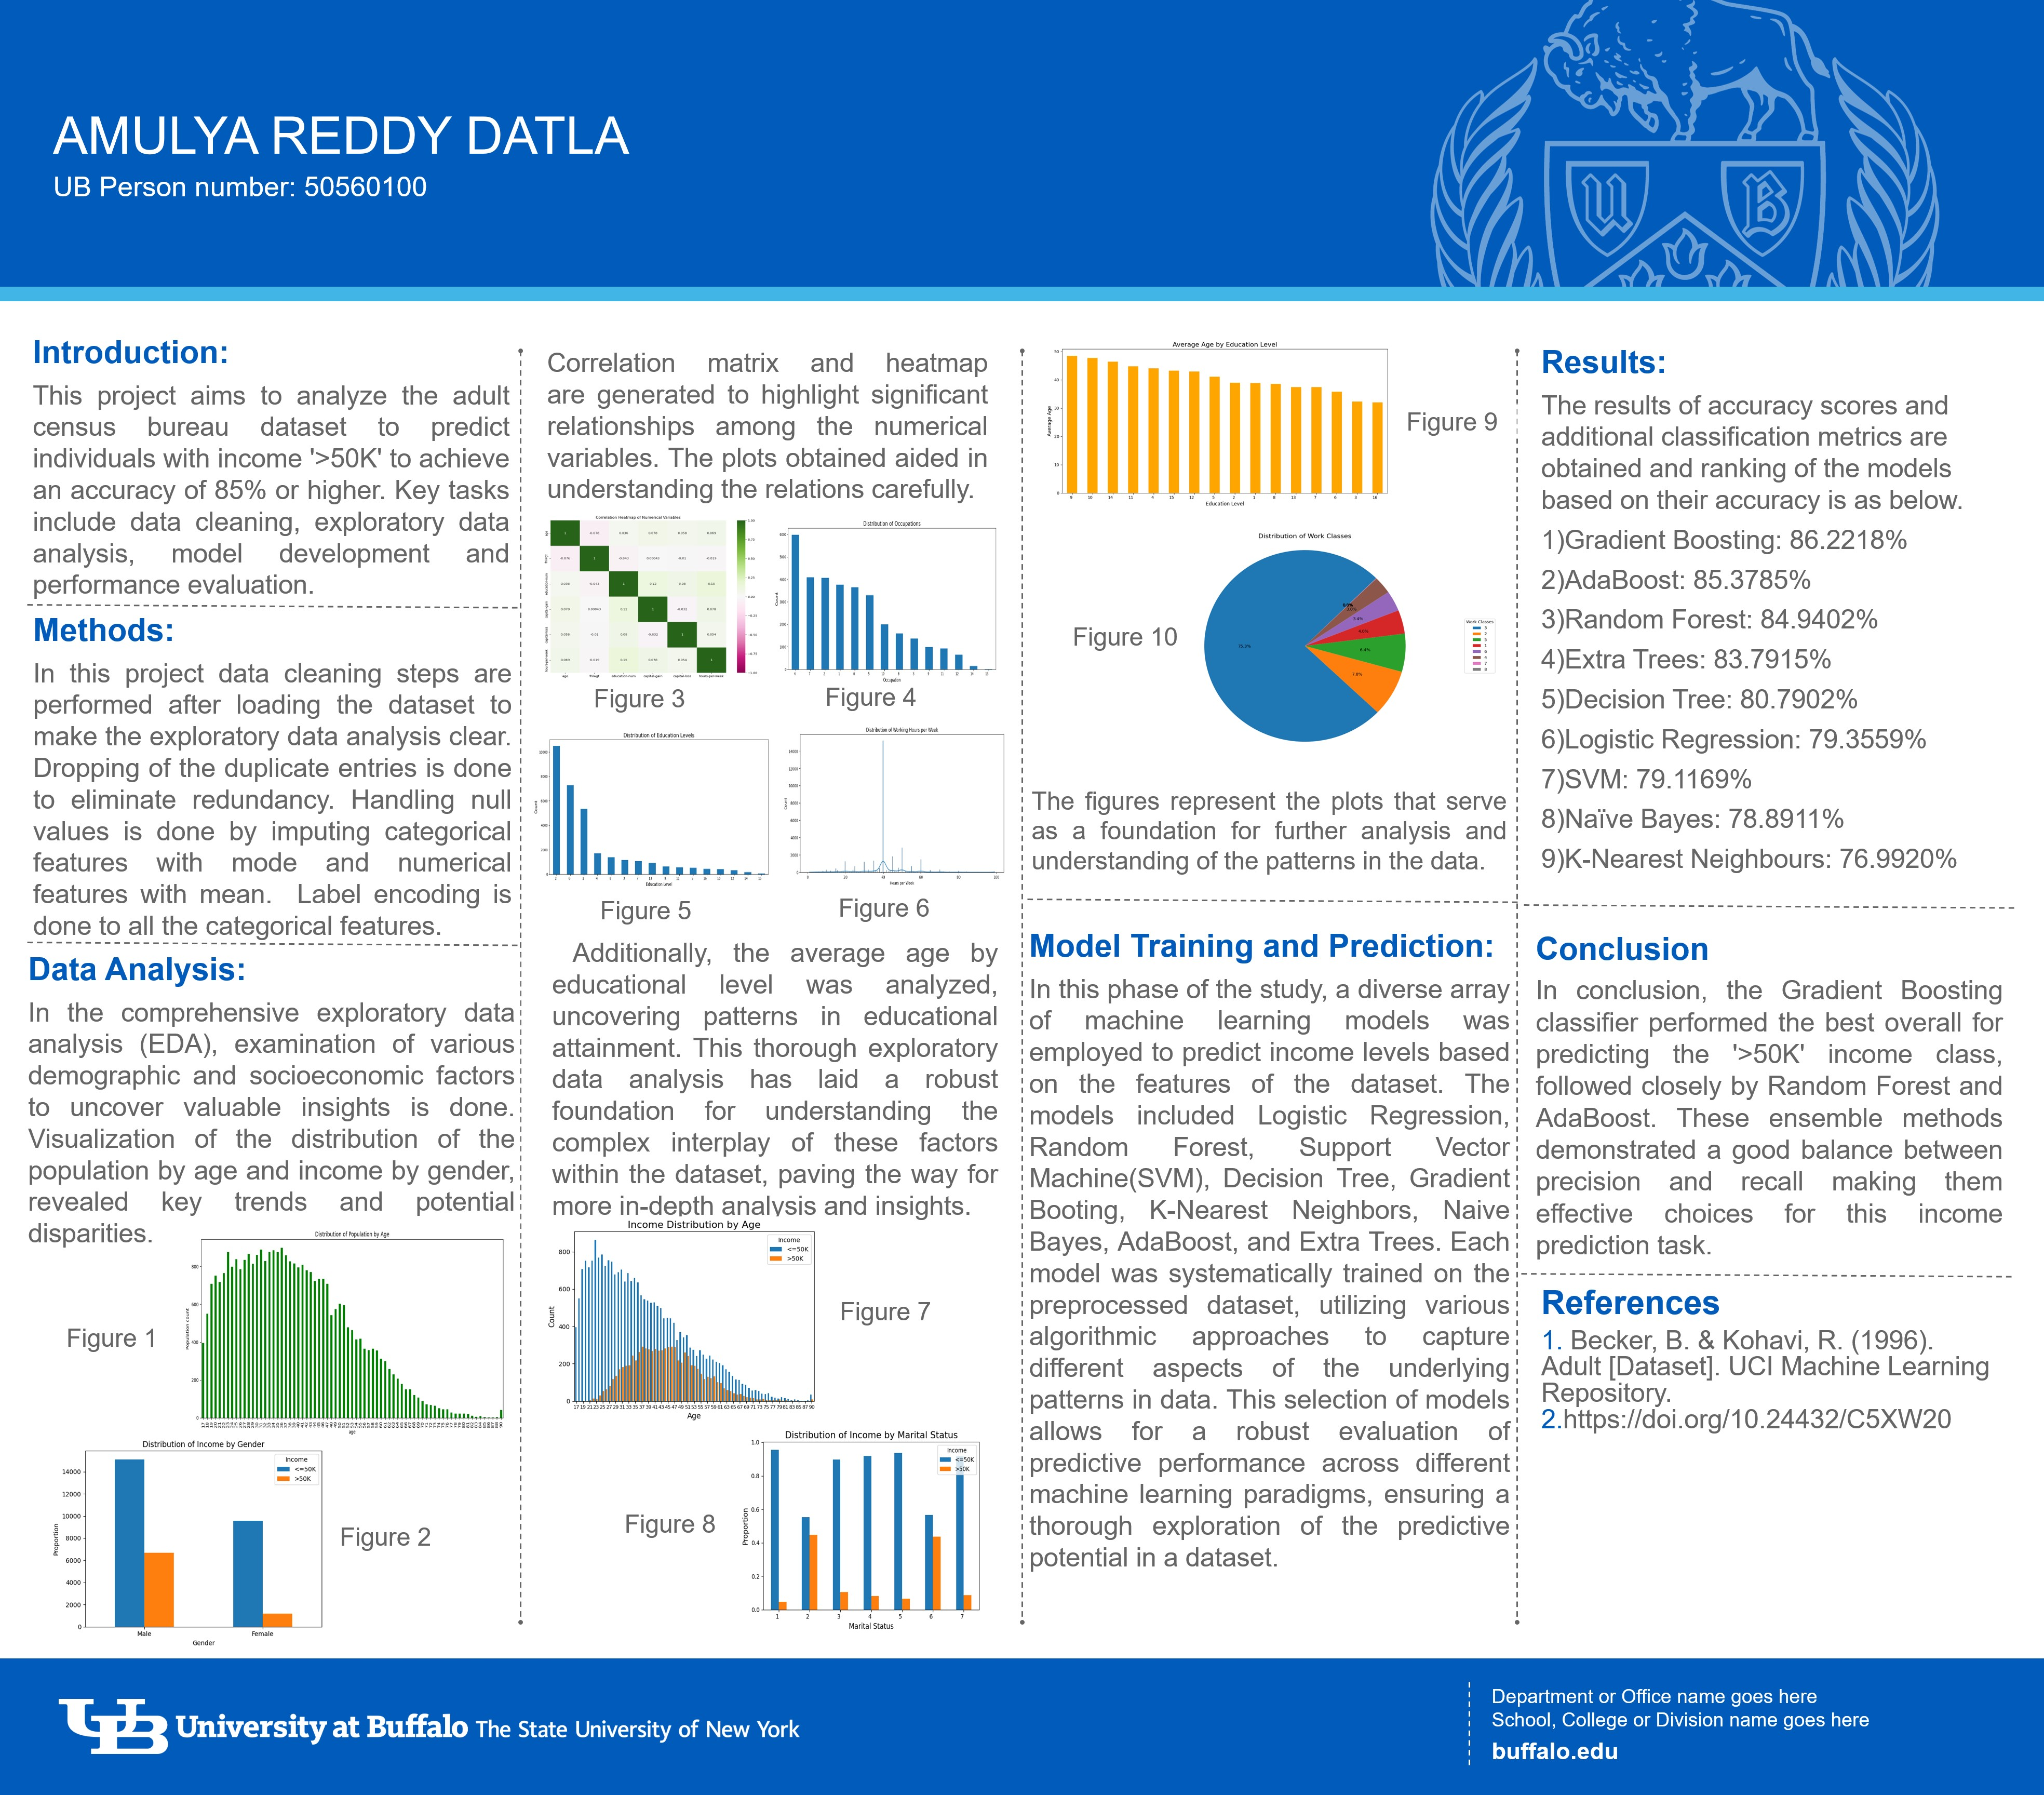

In [45]:
image_path = r'C:\Users\L E N O V O\Desktop\ML\Project_1_python\Poster.jpg'
display(Image(filename=image_path))